# OOP Part 2

Here’s a set of Object-Oriented Programming (OOP) examples designed for a GIS class, focusing on core GIS concepts like layers, spatial data, and geoprocessing tasks. 
These examples introduce the four pillars of OOP (encapsulation, inheritance, polymorphism, and abstraction)

## Import Library

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

## Encapsulation 

* Representing a Geospatial Point
* Encapsulation is shown through the private attributes `__x` and `__y`, and methods `get_coordinates()` and `set_coordinates()` to access or modify these attributes.

In [2]:
class Point:
    def __init__(self, x, y):
        self.__x = x  # Private attribute
        self.__y = y  # Private attribute

    def get_coordinates(self):
        return (self.__x, self.__y)

    def set_coordinates(self, x, y):
        self.__x = x
        self.__y = y

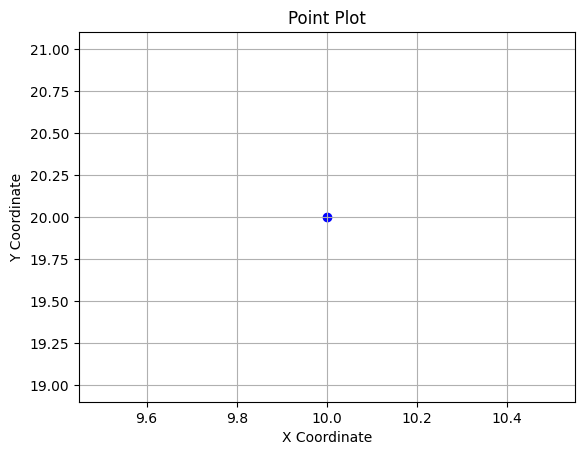

In [3]:
point = Point(10, 20)
x, y = point.get_coordinates()

plt.scatter(x, y, color='blue')
plt.title("Point Plot")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.show()

## Inheritance (Creating Different Spatial Layers)

In [24]:
class GISlayer:
    def __init__(self, name, feature_type, filepath):
        self.name = name
        self.feature_type = feature_type
        self.filepath = filepath

    def plot_layer(self, color='blue'):  # Add color parameter with a default value
        gdf = gpd.read_file(self.filepath)  # Load the GeoDataFrame
        gdf.plot(color=color)  # Apply the specified color to all features
        plt.title(f"Layer: {self.name}")
        plt.show()

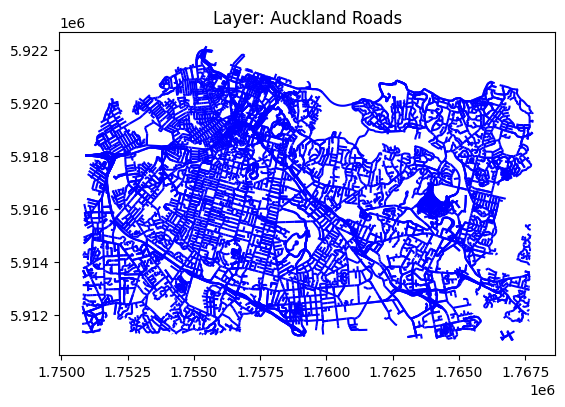

In [25]:
vector1 = GISlayer("Auckland Roads", "Line", "GISfiles/auckland_road.shp")
vector1.plot_layer()

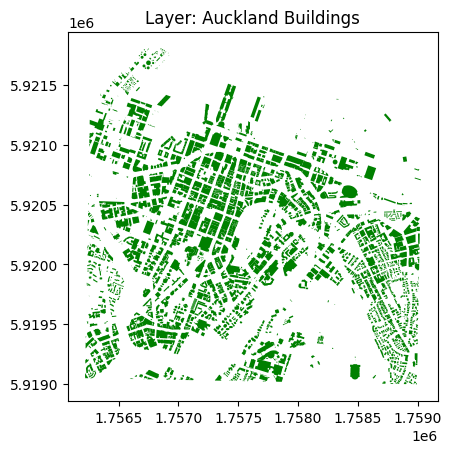

In [26]:
vector2 = GISlayer("Auckland Buildings", "Line", "GISfiles/auckland_buildings.shp")
vector2.plot_layer(color='green')

## Using GIS Tool in OOP: Buffered Layer

In [28]:
class Buffer:
    def __init__(self, layer, distance):  # Initializing with a layer and buffer distance
        self.layer = layer  # Assigning the layer (e.g., roads)
        self.distance = distance  # Assigning the buffer distance (e.g., 1000 meters)

    def run(self):  # The run method will perform the buffer operation
        gdf = gpd.read_file(self.layer.filepath)  # Reading the spatial file (Shapefile) into a GeoDataFrame
        buffered = gdf.buffer(self.distance)  # Creating the buffer based on the specified distance
        return buffered  # Returning the buffered layer

    def plot(self):  # The plot method will visualize the results
        gdf = gpd.read_file(self.layer.filepath)  # Reading the original spatial layer
        buffered = gdf.buffer(self.distance)  # Creating the buffer for visualization
        fig, ax = plt.subplots()  # Creating a figure and axes for the plot
        gdf.plot(ax=ax, color="blue", alpha=0.5)  # Plotting the original layer in blue
        buffered.plot(ax=ax, color="green", alpha=0.5)  # Plotting the buffer in green
        plt.title(f"Buffered Layer: {self.layer.name} by {self.distance} units")  # Adding a title
        plt.show()  # Displaying the plot
    
    def info(self):
        return f"Layer: {self.layer.name}, Buffer Distance: {self.distance} units"    

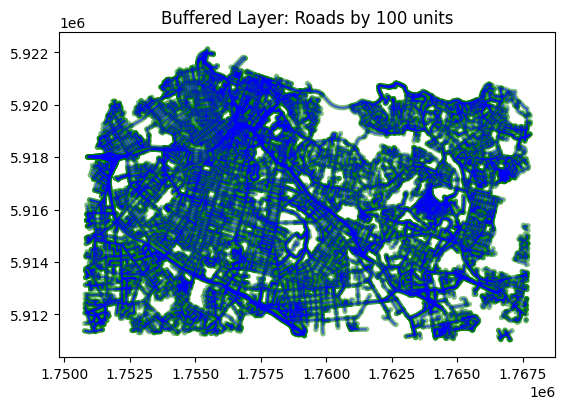

In [30]:
vector = GISlayer("Roads", "Line", "GISfiles/auckland_road.shp")
buffer_task = Buffer(vector, 100)
buffer_task.plot()

In [31]:
print(type(buffer_task))
print(dir(buffer_task))
print(vars(buffer_task))
print(buffer_task.info())


<class '__main__.Buffer'>
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'distance', 'info', 'layer', 'plot', 'run']
{'layer': <__main__.GISlayer object at 0x3026c2f90>, 'distance': 100}
Layer: Roads, Buffer Distance: 100 units


## Polymorphism (Handling Different Spatial Data Types)

In [34]:
class SpatialLayer:
    def info(self):
        pass

class PointLayer(SpatialLayer):
    def __init__(self, name, num_points):
        self.name = name
        self.num_points = num_points

    def info(self):
        return f"Point Layer: {self.name}, contains {self.num_points} points."

class LineLayer(SpatialLayer):
    def __init__(self, name, length):
        self.name = name
        self.length = length

    def info(self):
        return f"Line Layer: {self.name}, total length: {self.length} km."

class PolygonLayer(SpatialLayer):
    def __init__(self, name, area):
        self.name = name
        self.area = area

    def info(self):
        return f"Polygon Layer: {self.name}, total area: {self.area} square km."

In [35]:
# Example usage in a real GIS context
point_layer = PointLayer("Cities", 100)  # Cities dataset
line_layer = LineLayer("Roads", 500)     # Roads dataset
polygon_layer = PolygonLayer("Parcels", 1500)  # Land parcels dataset

# Collect all layers
layers = [point_layer, line_layer, polygon_layer]

# Polymorphic behaviour
for layer in layers:
    print(layer.info())


Point Layer: Cities, contains 100 points.
Line Layer: Roads, total length: 500 km.
Polygon Layer: Parcels, total area: 1500 square km.


## Abstraction

In a GIS system, you often need to perform geoprocessing tasks like buffering, clipping, or intersection. You can abstract these tasks into a general GeoprocessingTask class and implement specific tasks like Buffer and Clip.

In [55]:
from abc import ABC, abstractmethod
import geopandas as gpd

class GeoprocessingTask(ABC):
    @abstractmethod
    def run(self):
        pass

class Buffer(GeoprocessingTask):
    def __init__(self, input_layer, distance):
        self.input_layer = input_layer
        self.distance = distance

    def run(self):
        gdf = gpd.read_file(self.input_layer.filepath)
        buffered = gdf.buffer(self.distance)
        return buffered

class Clip(GeoprocessingTask):
    def __init__(self, input_layer, clip_layer):
        self.input_layer = input_layer
        self.clip_layer = clip_layer

    def run(self):
        gdf_input = gpd.read_file(self.input_layer.filepath)
        gdf_clip = gpd.read_file(self.clip_layer.filepath)
        clipped = gpd.clip(gdf_input, gdf_clip)
        return clipped
    
    def plot(self):
        # Perform the clip and plot only the clipped result
        gdf_input = gpd.read_file(self.input_layer.filepath)
        gdf_clip = gpd.read_file(self.clip_layer.filepath)
        clipped = gpd.clip(gdf_input, gdf_clip)
        
        # Plot only the clipped result
        clipped.plot(color='green', alpha=0.7)
        plt.title(f"Clipped {self.input_layer.name} within {self.clip_layer.name}")
        plt.show()

In [62]:
# Example usage
roads_layer = GISlayer("Roads", "Line", "GISfiles/auckland_road.shp")  # Input layer (roads)
boundary_layer = GISlayer("CBD", "Polygon", "GISfiles/auckland_cbd_boundary.shp")  # Clip layer (city boundary)

buffer_task = Buffer(roads_layer, 100)  # Buffer task to create a 500m buffer
clip_task = Clip(roads_layer, boundary_layer)  # Clip task to clip roads within the city boundary

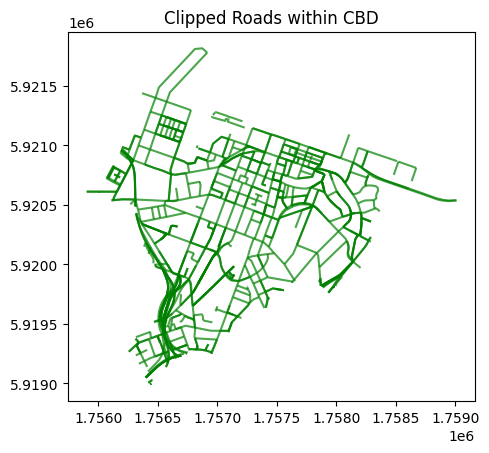

In [63]:
# Run tasks
buffered_roads = buffer_task.run()
clipped_roads = clip_task.run()

clip_task.plot()  # Plot the original and clipped layers